# Are WR fantasy football points indicative of QB points?

The NFL season is rapidly approaching, as is the fantasy football season. I set out to learn more about the relationships between quarterback play and wide receiver play before my draft on September 8th. 

This data is taken from Yahoo's fantasy records for a standard league. I wasn't interested in PPR leagues.

Fantasy football points are certainly relevant when investigating fantasy success; however, they are also a reasonable general success metric for someone who isn't interested in scraping the yardage, passing/receiving touchdowns, injuries, and other such potentially relevant metrics and subsequently attributing some sort of weight to each of them. Basically, while those numbers are valuable, I'm happy to draw conclusions about overall play quality from fantasy points.

Anywho, regardless of whether this is valuable information to anybody else, it is at least good practice for me.

In [416]:
# import packages

from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import requests
import pandas as pd
import time
import numpy as np

## WR requests

In [417]:
# get top 150 WR info 
## Do I have to do 6 different gets? Is there a way to navigate the page without selenium and just do one request?
## Sleep is well-intended, but is it necessary or even helpful?

r1 = requests.get("https://fantasy.nfl.com/research/scoringleaders?position=3&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=1")
soup1 = bs(r1.content)
time.sleep(.5)

r2 = requests.get("https://fantasy.nfl.com/research/scoringleaders?offset=26&position=3&sort=pts&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=1")
soup2 = bs(r2.content)
time.sleep(.5)

r3 = requests.get("https://fantasy.nfl.com/research/scoringleaders?offset=51&position=3&sort=pts&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=1")
soup3 = bs(r3.content)
time.sleep(.5)

r4 = requests.get("https://fantasy.nfl.com/research/scoringleaders?offset=76&position=3&sort=pts&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=1")
soup4 = bs(r4.content)
time.sleep(.5)

r5 = requests.get("https://fantasy.nfl.com/research/scoringleaders?offset=101&position=3&sort=pts&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=1")
soup5 = bs(r5.content)
time.sleep(.5)

r6 = requests.get("https://fantasy.nfl.com/research/scoringleaders?offset=126&position=3&sort=pts&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=1")
soup6 = bs(r6.content)

## Collect desired columns: name, team, points, position

In [418]:
# Get player information
## can I map 6 soups together into the player_list? Should I make big soup instead of big combined player info? Refactor

player_info1 = soup1.findAll("td", {"class": "playerNameAndInfo"} )
player_info2 = soup2.findAll("td", {"class": "playerNameAndInfo"} )
player_info3 = soup3.findAll("td", {"class": "playerNameAndInfo"} )
player_info4 = soup4.findAll("td", {"class": "playerNameAndInfo"} )
player_info5 = soup5.findAll("td", {"class": "playerNameAndInfo"} )
player_info6 = soup6.findAll("td", {"class": "playerNameAndInfo"} )

combined_player_info = player_info1 + player_info2 + player_info3 + player_info4 + player_info5 + player_info6

In [419]:
# Extract player names

player_list = [combined_player_info[name].a.text for name in range(len(combined_player_info))] 

In [420]:
# Extract player positions (might work with TEs later)

position_list = [combined_player_info[name].em.text.split(" ")[0] for name in range(len(combined_player_info))]

In [421]:
# Extract player teams
# Add N/A for players who have left teams
# list comprehension is nice, but hard to read

team_list = ['N/A' if len(combined_player_info[team].em.text.split(" ")) <= 1 else combined_player_info[team].em.text.split(" ")[2] for team in range(len(combined_player_info))]

In [422]:
# Extract player points

player_points1 = soup1.findAll("td", {"class": "statTotal"} )
player_points2 = soup2.findAll("td", {"class": "statTotal"} )
player_points3 = soup3.findAll("td", {"class": "statTotal"} )
player_points4 = soup4.findAll("td", {"class": "statTotal"} )
player_points5 = soup5.findAll("td", {"class": "statTotal"} )
player_points6 = soup6.findAll("td", {"class": "statTotal"} )
 
combined_player_points = player_points1 + player_points2 + player_points3 + player_points4 + player_points5 + player_points6

points_list = [float(combined_player_points[points].text) for points in range(len(combined_player_points))]

## Create WR DataFrame

In [423]:
df_WRs = pd.DataFrame({"Name": player_list, "Points": points_list, "Team": team_list, "Position": position_list})
df_WRs.head()

,Name,Points,Team,Position
0,Michael Thomas,374.60,NO,WR
1,Chris Godwin,276.10,TB,WR
2,Julio Jones,274.10,ATL,WR
3,Cooper Kupp,270.50,LA,WR
4,DeAndre Hopkins,268.54,ARI,WR


In [424]:
# Check for null WR names 

check_null_WRs = pd.isnull(df_WRs["Name"])

WR_count = 0
for name in check_null_WRs:
    if name == True:
        WR_count += 1
print(WR_count)

0


While I could go through and change player teams individually for every player who has moved, I'll just do so for the top 75 players, as they will skew results the most.

In [425]:
df_WRs.at[4,"Team"] = "HOU"
df_WRs.at[23, "Team"] = "MIN"
df_WRs.at[29, "Team"] = "SF"
df_WRs.at[39, "Team"] = "NYJ"
df_WRs.at[43, "Team"] = "DAL"
df_WRs.at[50, "Team"] = "TB"
df_WRs.at[61, "Team"] = "LA"
df_WRs.at[69, "Team"] = "NE"
df_WRs.at[75, "Team"] = "PHI"
df_WRs.head()

,Name,Points,Team,Position
0,Michael Thomas,374.60,NO,WR
1,Chris Godwin,276.10,TB,WR
2,Julio Jones,274.10,ATL,WR
3,Cooper Kupp,270.50,LA,WR
4,DeAndre Hopkins,268.54,HOU,WR


## QB requests

In [426]:
r7 = requests.get("https://fantasy.nfl.com/research/scoringleaders?position=1&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=1")
soup7 = bs(r7.content)
time.sleep(.5)

r8 = requests.get("https://fantasy.nfl.com/research/scoringleaders?offset=26&position=1&sort=pts&statCategory=stats&statSeason=2019&statType=seasonStats&statWeek=1")
soup8 = bs(r8.content)


In [427]:
player_info7 = soup7.findAll("td", {"class": "playerNameAndInfo"})
player_info8 = soup8.findAll("td", {"class": "playerNameAndInfo"})
combined_QB_info = player_info7 + player_info8

We have 50 QBs here. Each of 32 teams is generally led by 1 qb per season. No reason not to keep backup QBs though, since their points were still valid for team QB play evaluation.

Also, the smaller sample size of QBs means that they are a) more significant in determining relative success from last season, and b) relatively easy to adjust within a DataFrame, without needing to load in a list of last year's QBs. While this wouldn't be practical for large datasets, in this case I can do it manually.

In [428]:
# Extract QB names (same as with WRs)

QB_names = [combined_QB_info[name].a.text for name in range(len(combined_QB_info))]

In [429]:
# Extract QB teams (same as with WRs. No "N/A"s this time; might as well keep that anyway)

QB_teams = ['N/A' if len(combined_QB_info[team].em.text.split(" ")) <= 1 else combined_QB_info[team].em.text.split(" ")[2] for team in range(len(combined_QB_info))]

In [430]:
# Extract QB points (same as with WRs)

player_points7 = soup7.findAll("td", {"class": "statTotal"} )
player_points8 = soup8.findAll("td", {"class": "statTotal"} )

combined_QB_points = player_points7 + player_points8

QB_points = [float(combined_QB_points[points].text) for points in range(len(combined_QB_points))]

Skipping position in this one, since this is a separate DataFrame of only QBs

## Create QB DataFrame

In [431]:
df_QBs = pd.DataFrame({"Name": QB_names, "Team": QB_teams, "Points": QB_points})
df_QBs.head()

,Name,Team,Points
0,Lamar Jackson,BAL,415.68
1,Dak Prescott,DAL,337.78
2,Russell Wilson,SEA,328.60
3,Deshaun Watson,HOU,320.98
4,Jameis Winston,NO,305.36


In [432]:
# Check for null QB names 

check_null_QBs = pd.isnull(df_QBs["Name"])

QB_count = 0
for name in check_null_QBs:
    if name == True:
        QB_count += 1
print(QB_count)

0


Similarly for QBs, I'll adjust them to their appropriate 2019 teams (more than I was expecting tbh)

In [433]:
df_QBs.at[4, "Team"] = "TB"
df_QBs.at[11, "Team"] = "NE"
df_QBs.at[17, "Team"] = "LAC"
df_QBs.at[24, "Team"] = "CIN"
df_QBs.at[27, "Team"] = "CAR"
df_QBs.at[30, "Team"] = "WAS"
df_QBs.at[32, "Team"] = "NO"
df_QBs.at[33, "Team"] = "TEN"
df_QBs.at[34, "Team"] = "DEN"
df_QBs.at[37, "Team"] = "DET"
df_QBs.at[41, "Team"] = "JAX"
df_QBs.at[43, "Team"] = "DEN"
df_QBs.at[44, "Team"] = "CHI"
df_QBs.at[46, "Team"] = "IND"
df_QBs.at[49, "Team"] = "CAR"
df_QBs.head()

,Name,Team,Points
0,Lamar Jackson,BAL,415.68
1,Dak Prescott,DAL,337.78
2,Russell Wilson,SEA,328.60
3,Deshaun Watson,HOU,320.98
4,Jameis Winston,TB,305.36


## Create DataFrame with teams, QB points, and WR points

In [434]:
# is this too much list comprehension? Better way to do this?

# make an array of each team
all_teams = df_QBs.Team.unique()

# make a list of the points for each QB on the same team, then iterate through all_teams and take the sum of each list
all_QB_points = [sum([(df_QBs.iloc[i].Points) for i in range(len(df_QBs)) if (df_QBs.iloc[i].Team == all_teams[j])]) for j in range(len(all_teams))]

# make a list of the points for each WR on the same team, then iterate through all_teams and take the sum of each list
all_WR_points = [sum([(df_WRs.iloc[i].Points) for i in range(len(df_WRs)) if (df_WRs.iloc[i].Team == all_teams[j])]) for j in range(len(all_teams))]

In [435]:
# make DataFrame

df_all = pd.DataFrame({"Team": all_teams, "QB points": all_QB_points, "WR points": all_WR_points})
df_all.head()

,Team,QB points,WR points
0,BAL,415.68,292.30
1,DAL,337.78,614.10
2,SEA,328.60,546.40
3,HOU,337.88,600.64
4,TB,305.36,730.40


## Graph results with matplotlib

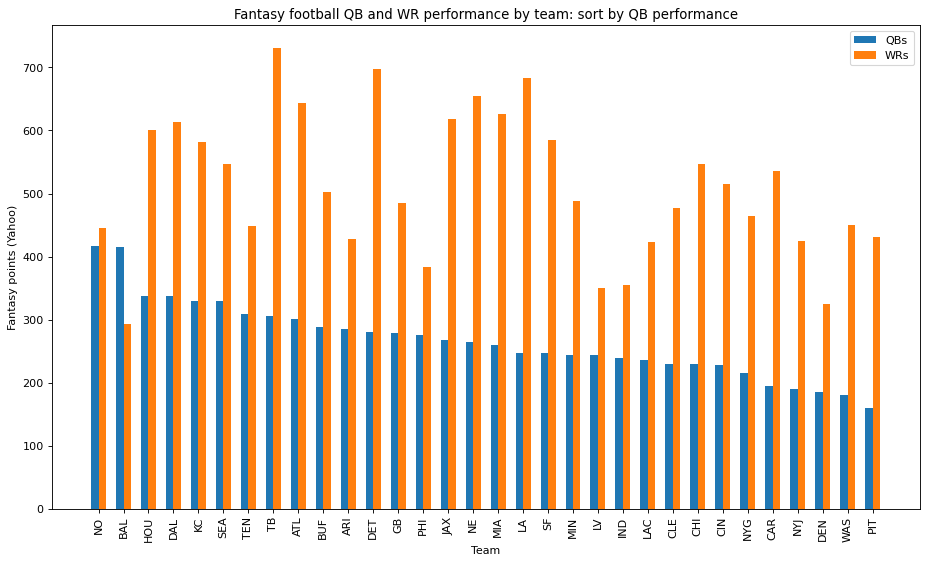

In [436]:
# show bar chart organized by WRs
plt.figure(figsize=(14, 8), dpi=80)

N = 32
ind = np.arange(N)
width = 0.3

df_plot_QB = df_all.sort_values(by='QB points',ascending=False)
plt.bar(ind, df_plot_QB["QB points"], width, label='QBs')
plt.bar(ind + width, df_plot_QB["WR points"], width,
    label='WRs')

plt.ylabel('Fantasy points (Yahoo)')
plt.xlabel('Team')
plt.title('Fantasy football QB and WR performance by team: sort by QB performance')
plt.xticks(ind + width / 2, df_plot_QB["Team"], rotation="vertical")
plt.legend(loc='best')
plt.show()

We see Baltimore and New Orleans doing far better than third place Houston; however, it is worth noting that several of the points for NO come from their abnormal use of QB Taysom Hill, who often lines up as a receiver. This means his receiving points count for double for the Saints' total QB points.

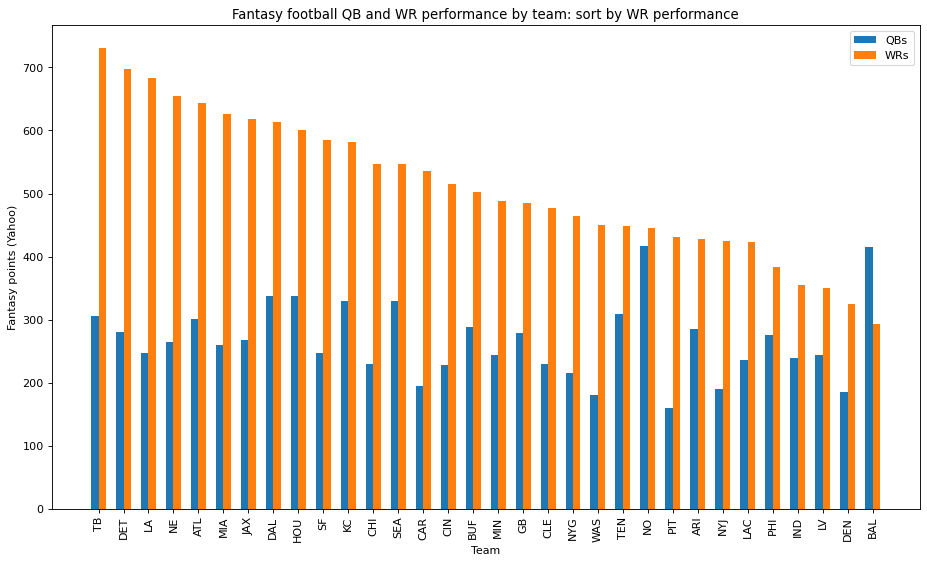

In [437]:
# show bar chart organized by WRs

plt.figure(figsize=(14, 8), dpi=80)

N = 32
ind = np.arange(N)
width = 0.3

df_plot_WR = df_all.sort_values(by='WR points',ascending=False)
plt.bar(ind, df_plot_WR["QB points"], width, label='QBs')
plt.bar(ind + width, df_plot_WR["WR points"], width,
    label='WRs')

plt.ylabel('Fantasy points (Yahoo)')
plt.xlabel('Team')
plt.title('Fantasy football QB and WR performance by team: sort by WR performance')
plt.xticks(ind + width / 2, df_plot_WR["Team"], rotation="vertical")
plt.legend(loc='best')
plt.show()

Interestingly, our two best QB teams are in the lower half of this sorted graph. NO comes in at 23, which is especially remarkable considering they have the top overall receiver in Michael Thomas. 

More surprising is that BAL is dead last in WR points, by a decent margin. The very best individual QB score pairs with the very worst WR score. There are several reasons why this is: Lamar Jackson is a supremely mobile QB who scores a lot by running. He is also an excellent passer, but most of those passes apparently go to TEs and RBs. His best receiver was a rookie last year who will undoubtedly improve this year.

## Conclusions

It seems, unsurprisingly, like there is some relationship between QB success and WR success. It also seems like some teams' WRs underperformed relative to their QBs. This could be due to a number of factors; personnel selection due to talented TEs and RBs, game balance, play selection, QB choosing to run vs pass, etc. 

I couldn't get a trendline to work, but from observation, better QB play means better WR play. This also shows which teams place more emphasis on WR play than others, which is probably the most immediately helpful takeaway from this exercise. 

Furthermore, good QB play is only slightly related to quality WR play; this would indicate that the best QBs often find a way to get points regardless of their supporting cast. 

## Issues

Data issues
- only changed the top 75 WRs

Can't do much meaningful forecasting from this data
- doesn't include rookies
- doesn't include current injuries, including COVID things
- doesn't include injury likelihood (could extrapolate from history by comparing how many games played vs how many games total)

## Future changes or additions and other thoughts

- more positions 
    - Tight ends 
    - Running backs
- add rookie predictions
    - Maybe by comparing historical success based on draft position?
- find trendline/meaningful number representing relationship of QB fantasy success to WR fantasy success
- try keeping only passing points for QBs
    - determine best passing QBs, might be a better predictor of team potential for WR success

The best WRs on each team are already pretty well-known. I wonder if we remove the top 50 or so how the results would change? That would probably help in making later picks by being a better indicator of which teams are more likely to use their benches or WR2s.

# Thanks for reading!